In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [91]:
path='./Indonesia_airport.csv'
df=pd.read_csv(path)

In [92]:
df.head(5)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,03-01-2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,03-02-2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,03-02-2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,03-02-2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,03-03-2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [93]:
print(f"Dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

Dataframe has 499 rows and 38 columns


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         499 non-null    object 
 1   Location ISO Code            499 non-null    object 
 2   Location                     499 non-null    object 
 3   New Cases                    499 non-null    int64  
 4   New Deaths                   499 non-null    int64  
 5   New Recovered                499 non-null    int64  
 6   New Active Cases             499 non-null    int64  
 7   Total Cases                  499 non-null    int64  
 8   Total Deaths                 499 non-null    int64  
 9   Total Recovered              499 non-null    int64  
 10  Total Active Cases           499 non-null    int64  
 11  Location Level               499 non-null    object 
 12  City or Regency              0 non-null      float64
 13  Province            

In [95]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,0.0,499.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,413.000000,419.000000
mean,6.881764,0.853707,1.110220,4.917836,57.565130,10.529058,37.074148,9.961924,NaN,39.176353,...,1491.849499,112.117195,-3.254493,0.297796,2.116593,0.043106,0.608176,0.060782,1.130605,0.967637
std,21.925395,2.564165,5.866133,19.492334,209.488681,23.631217,77.268455,193.962342,NaN,100.698868,...,4042.307643,9.090933,3.637998,0.878337,5.074824,0.143619,1.332998,0.133492,2.971639,0.677916
min,0.000000,0.000000,0.000000,-103.000000,1.000000,0.000000,0.000000,-469.000000,NaN,1.000000,...,8.590000,96.910522,-8.606999,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-10.000000,NaN,7.000000,...,69.790000,106.109004,-6.456736,0.000000,0.330000,0.000000,0.000000,0.000000,0.620000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,3.000000,0.000000,NaN,11.000000,...,190.170000,110.444878,-3.533584,0.000000,0.760000,0.000000,0.240000,0.020000,1.000000,1.000000
75%,2.000000,1.000000,0.000000,2.000000,18.000000,8.500000,41.000000,4.000000,NaN,18.000000,...,1108.640000,116.468440,-0.086475,0.280000,2.015000,0.000000,0.550000,0.060000,1.000000,1.000000
max,196.000000,21.000000,91.000000,163.000000,1986.000000,181.000000,543.000000,1671.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,9.250000,56.060000,1.750000,10.880000,1.090000,57.000000,6.670000


In [96]:
df.dtypes

Date                            object
Location ISO Code               object
Location                        object
New Cases                        int64
New Deaths                       int64
New Recovered                    int64
New Active Cases                 int64
Total Cases                      int64
Total Deaths                     int64
Total Recovered                  int64
Total Active Cases               int64
Location Level                  object
City or Regency                float64
Province                        object
Country                         object
Continent                       object
Island                          object
Time Zone                       object
Special Status                  object
Total Regencies                  int64
Total Cities                   float64
Total Districts                  int64
Total Urban Villages           float64
Total Rural Villages           float64
Area (km2)                       int64
Population               

In [97]:
missing_vals=df.isnull().sum()
print(missing_vals)

Date                             0
Location ISO Code                0
Location                         0
New Cases                        0
New Deaths                       0
New Recovered                    0
New Active Cases                 0
Total Cases                      0
Total Deaths                     0
Total Recovered                  0
Total Active Cases               0
Location Level                   0
City or Regency                499
Province                        33
Country                          0
Continent                        0
Island                          33
Time Zone                       33
Special Status                 417
Total Regencies                  0
Total Cities                     6
Total Districts                  0
Total Urban Villages             9
Total Rural Villages            34
Area (km2)                       0
Population                       0
Population Density               0
Longitude                        0
Latitude            

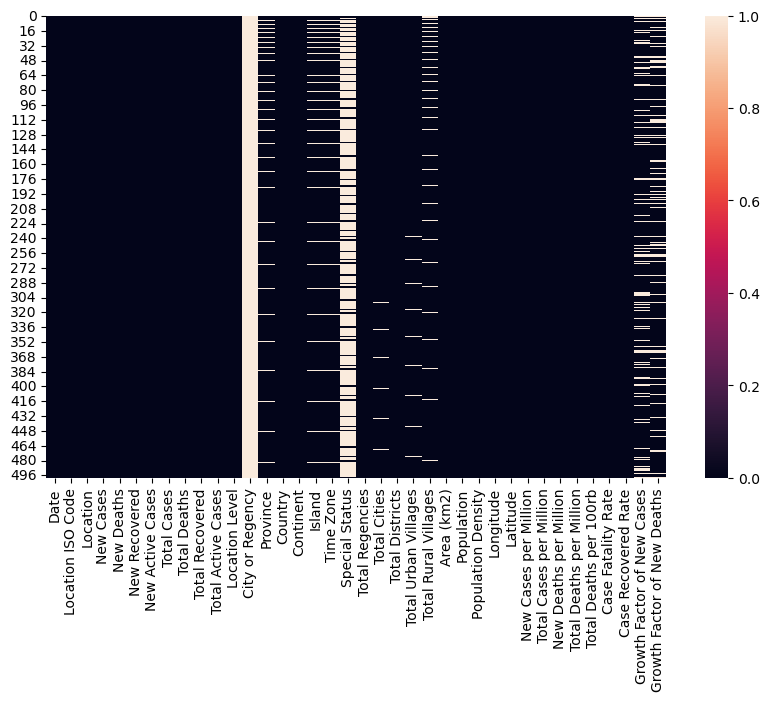

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [99]:
numerical_df=df.select_dtypes(include=[np.number])
print(numerical_df)

     New Cases  New Deaths  New Recovered  New Active Cases  Total Cases  \
0            2           0              0                 2           39   
1            2           0              0                 2           41   
2            2           0              0                 2            2   
3            1           0              0                 1            1   
4            2           0              0                 2           43   
..         ...         ...            ...               ...          ...   
494          3           1              0                 2           10   
495          0           0              0                 0            1   
496          0           0              0                 0            1   
497          0           0              0                 0            4   
498          6           1              0                 5           15   

     Total Deaths  Total Recovered  Total Active Cases  City or Regency  \
0           

In [100]:
numerical_cols=numerical_df.columns
print(numerical_cols)

Index(['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases',
       'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases',
       'City or Regency', 'Total Regencies', 'Total Cities', 'Total Districts',
       'Total Urban Villages', 'Total Rural Villages', 'Area (km2)',
       'Population', 'Population Density', 'Longitude', 'Latitude',
       'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Growth Factor of New Cases',
       'Growth Factor of New Deaths'],
      dtype='object')


In [101]:
for col in numerical_cols:
    df[col].fillna(df[col].mean(),inplace=True)

df.drop(columns='City or Regency',inplace=True)
df['Special Status'].fillna('Unknown',inplace=True)
df['Province'].fillna('Unknown',inplace=True)
df['Island'].fillna('Unknown',inplace=True)
df['Time Zone'].fillna('Unknown',inplace=True)

missing_vals=df.isnull().sum()
print(missing_vals)

Date                           0
Location ISO Code              0
Location                       0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Province                       0
Country                        0
Continent                      0
Island                         0
Time Zone                      0
Special Status                 0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths

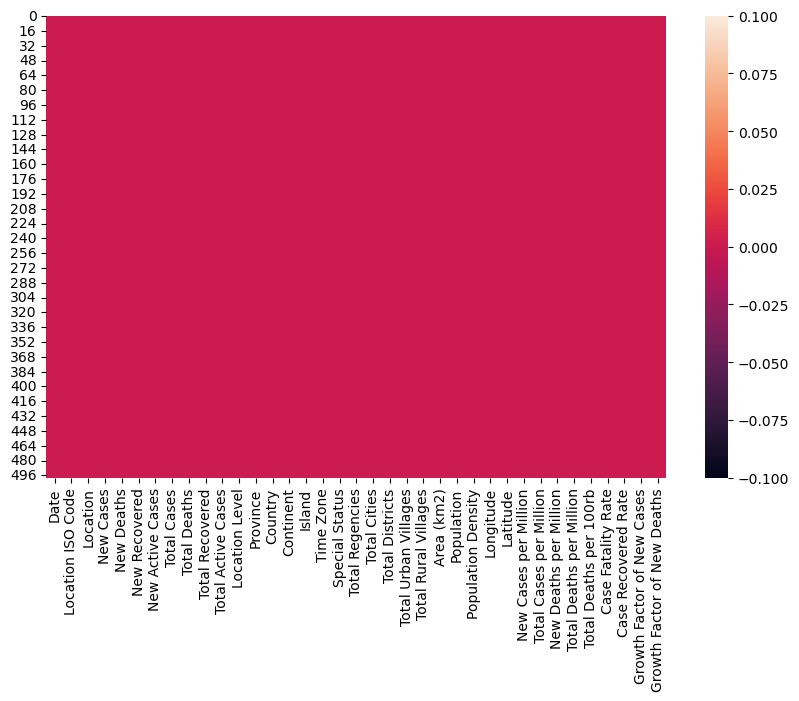

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

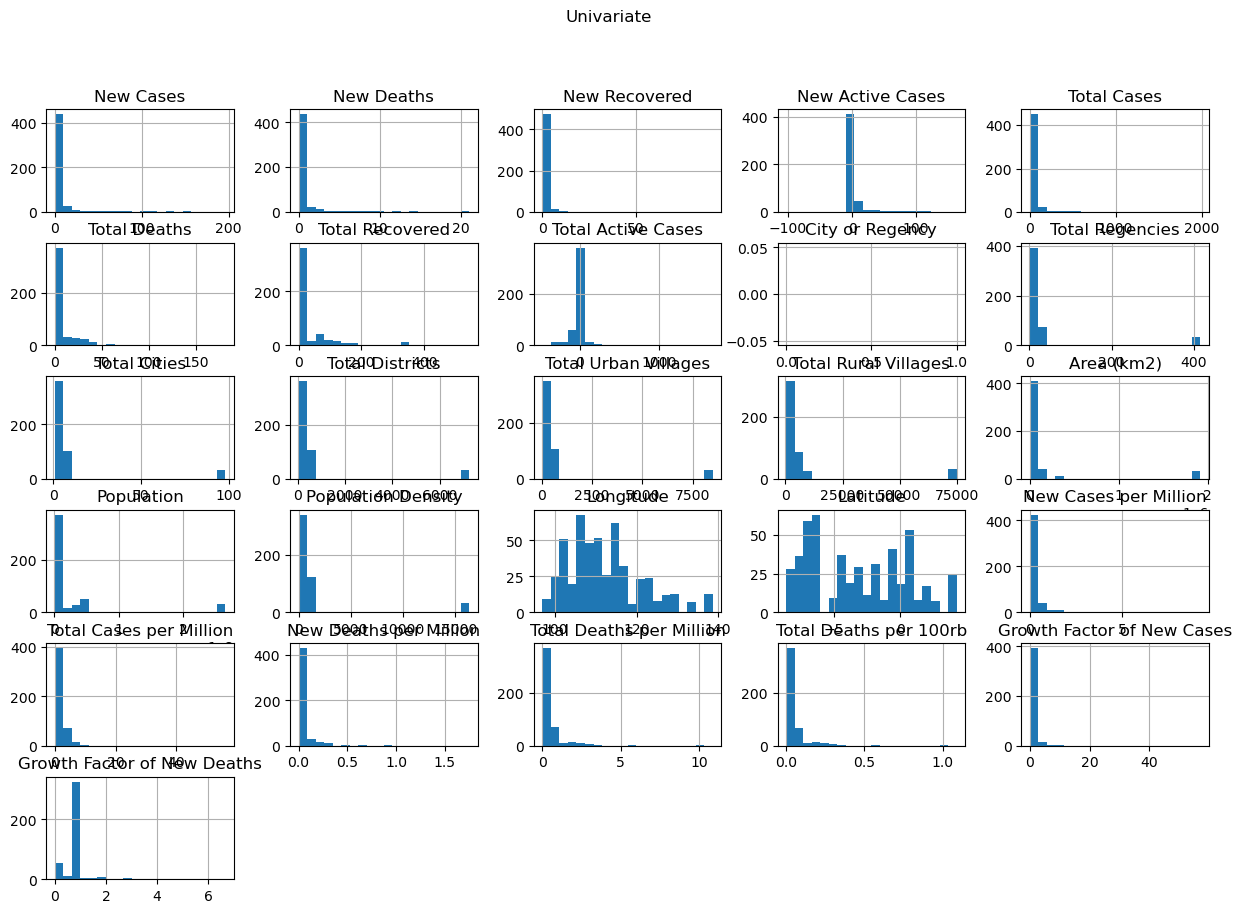

In [103]:
numerical_df.hist(figsize=(15,10),bins=20)
plt.suptitle('Univariate')
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

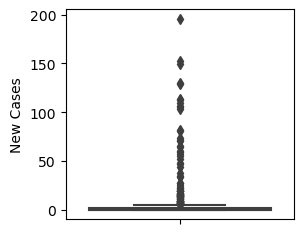

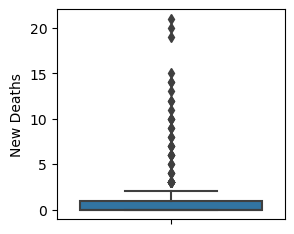

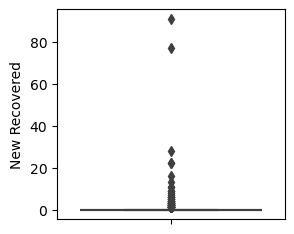

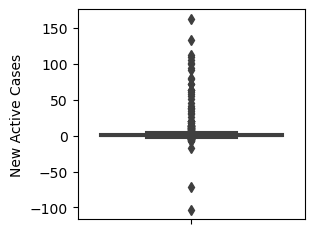

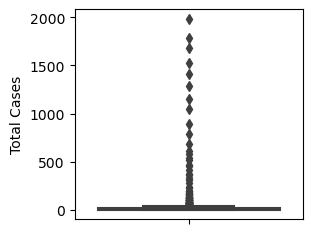

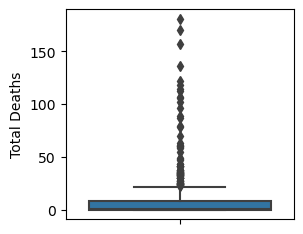

<Figure size 1000x600 with 0 Axes>

In [104]:
numerical_cols=df.select_dtypes(include=[np.number]).columns

for i,col in enumerate(numerical_cols,1):
    plt.figure(figsize=(10,6))
    plt.subplot(2,3,i)
    sns.boxplot(data=df,y=col)

plt.title('Outliers')
plt.show()

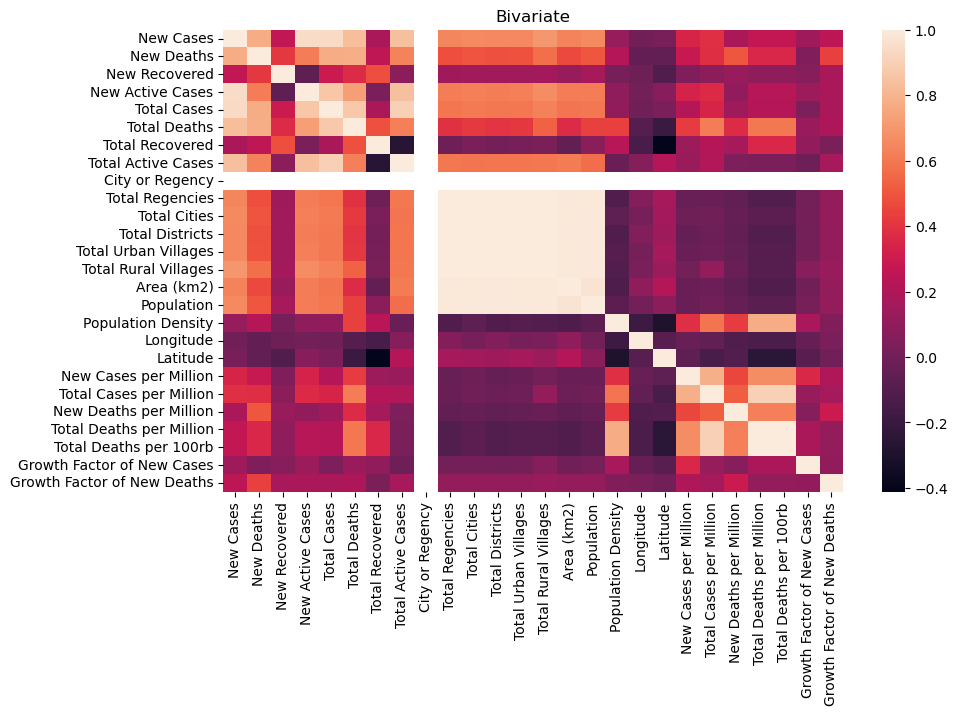

In [105]:
corr_matrix=numerical_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix)
plt.title('Bivariate')
plt.show()

In [106]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df,x_vars=numerical_cols[0],y_vars=numerical_cols[1],hue=df[numerical_cols[2]])
plt.title('Multivariate')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x600 with 0 Axes>

In [107]:
def label_encode(data,column):
    le=LabelEncoder()
    data[column]=le.fit_transform(data[column])
    return data

encoded_df=label_encode(df,'Latitude')
encoded_df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,03-01-2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,7,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,1.130605,0.967637
1,03-02-2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,7,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.000000,1.000000
2,03-02-2020,IDN,Indonesia,2,0,0,2,2,0,0,...,23,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,1.130605,0.967637
3,03-02-2020,ID-RI,Riau,1,0,0,1,1,0,1,...,27,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,1.130605,0.967637
4,03-03-2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,7,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.000000,1.000000


In [108]:
def dummy_encode(data,column):
    data=pd.get_dummies(data,columns=[column])
    return data

encoded_df=dummy_encode(df,'Time Zone')
encoded_df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Time Zone_UTC+07:00,Time Zone_UTC+08:00,Time Zone_UTC+09:00,Time Zone_Unknown
0,03-01-2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,1.84,0.18,51.28%,192.31%,1.130605,0.967637,True,False,False,False
1,03-02-2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,1.84,0.18,48.78%,182.93%,1.000000,1.000000,True,False,False,False
2,03-02-2020,IDN,Indonesia,2,0,0,2,2,0,0,...,0.00,0.00,0.00%,0.00%,1.130605,0.967637,False,False,False,True
3,03-02-2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.00,0.00,0.00%,100.00%,1.130605,0.967637,True,False,False,False
4,03-03-2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,1.84,0.18,46.51%,174.42%,1.000000,1.000000,True,False,False,False


In [109]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         499 non-null    object 
 1   Location ISO Code            499 non-null    object 
 2   Location                     499 non-null    object 
 3   New Cases                    499 non-null    int64  
 4   New Deaths                   499 non-null    int64  
 5   New Recovered                499 non-null    int64  
 6   New Active Cases             499 non-null    int64  
 7   Total Cases                  499 non-null    int64  
 8   Total Deaths                 499 non-null    int64  
 9   Total Recovered              499 non-null    int64  
 10  Total Active Cases           499 non-null    int64  
 11  Location Level               499 non-null    object 
 12  Province                     499 non-null    object 
 13  Country             

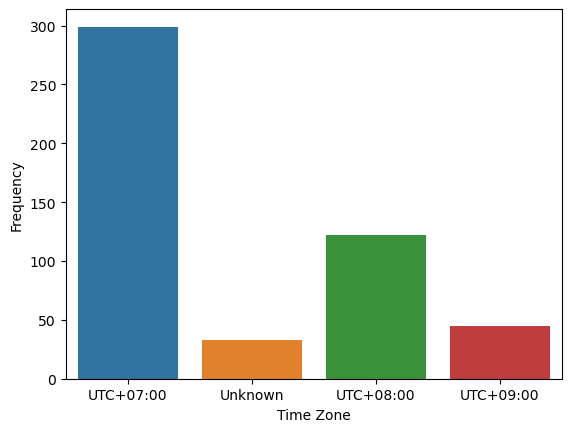

In [110]:
def frequency_dist(data,column):
    sns.countplot(data=data,x=column)
    plt.ylabel('Frequency')
    plt.show()

frequency_dist(df,'Time Zone')

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yashm\anaco

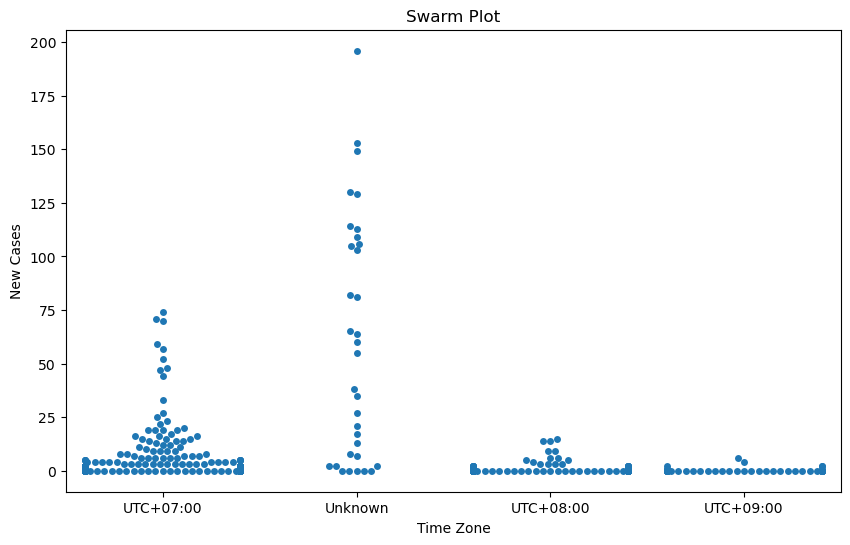

In [111]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df,x='Time Zone',y='New Cases')
plt.title('Swarm Plot')
plt.show()

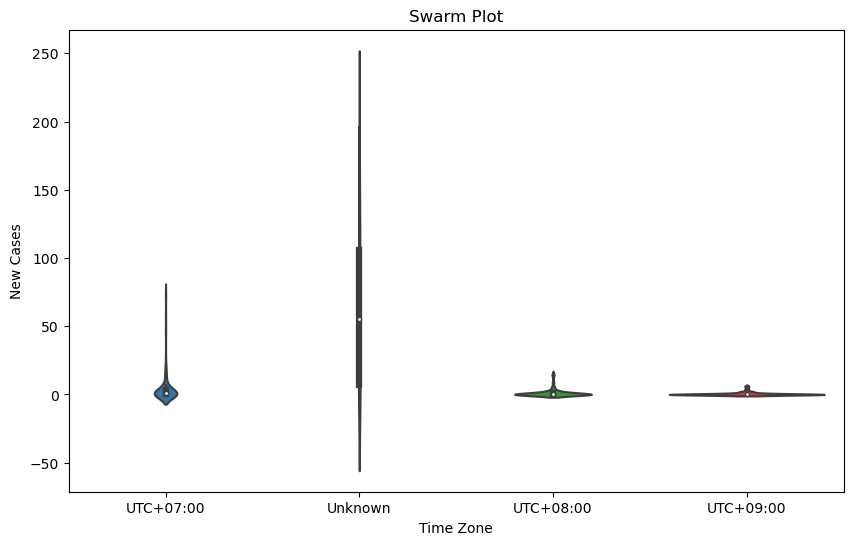

In [112]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='Time Zo',y='New Cases')
plt.title('Swarm Plot')
plt.show()